In [886]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 
def normalize(features):
    
    for feature in features.T:
        fmean = np.mean(feature)
        frange = np.amax(feature) - np.amin(feature)

        #Vector Subtraction
        feature -= fmean

        #Vector Division
        feature /= frange

    return features

def sigmoid(predictions):
    return (1/(1+np.exp(-predictions)))

def predict(features, weights):
    predictions=np.dot(features, weights)
    
    return predictions

def cost_function(features, targets, weights):
    N = len(targets)

    predictions = predict(features, weights)
    
    predictions = sigmoid(predictions)
    one = np.ones((N,1))
    predictions[predictions == 1] = 0.999

    cost = np.dot(targets.T,np.log(predictions))+np.dot((one-targets).T,np.log(one-predictions)) 
    
    return -1.0/(N) * cost.sum()

def gradient_descent(X, targets, weights, lr):
    
    N = len(X)

    #1 - Get Predictions
    predictions = predict(X, weights)
    predictions = sigmoid(predictions)
    #2 - Calculate error/loss
    error = targets - predictions

    
    gradient = np.dot(-X.T,  error)

    #4 Take the average error derivative for each feature
    gradient /= N
    gradient = gradient 
    #5 - Multiply the gradient by our learning rate
    gradient *= lr

    #6 - Subtract from our weights to minimize cost
    weights -= gradient

    return weights 

weights = np.random.rand(8,1)

train = pd.read_csv(r"C:\Users\Saurabh\OneDrive - Manipal Academy of Higher Education\Desktop\MRM-Taskphase\WEEK_2\Week-2-Project\Titanic Dataset\train.csv",index_col=0)
weights

array([[0.56709322],
       [0.7899042 ],
       [0.12550218],
       [0.48059885],
       [0.62716576],
       [0.87994411],
       [0.54367929],
       [0.07131247]])

In [887]:
arr=np.array([[1],[2],[3]])
x=np.dot(arr.T,arr).flatten()
print(x)

[14]


In [888]:
survived = np.array(train.Survived,dtype=np.float64)
survived.shape=(survived.size,1)

survived


array([[0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],

In [889]:
train['Sex']=train['Sex'].astype("category")
train['Sex']=train['Sex'].cat.reorder_categories(['male','female'], ordered=True)
train['Sex']=train['Sex'].cat.codes
train['Embarked']=train['Embarked'].astype("category")
train['Embarked']=train['Embarked'].cat.reorder_categories(['S','Q','C'], ordered=True)
train['Embarked']=train['Embarked'].cat.codes
#Sex = train.Sex
#dummies=pd.get_dummies(Sex)
#train=train.join(dummies)
#Embarked = train.Embarked
#dummies=pd.get_dummies(Embarked)
#train=train.join(dummies)
#Cabin = train.Cabin
#dummies=pd.get_dummies(Cabin)
#train=train.join(dummies)
train['Age']=train['Age'].fillna(train['Age'].median())
train['Embarked']=train['Embarked'].fillna(train['Embarked'].median())
features = np.array(train.loc[:,["Pclass","SibSp","Parch","Fare","Sex","Embarked","Age"]])
train.Age.head(10)

PassengerId
1     22.0
2     38.0
3     26.0
4     35.0
5     35.0
6     28.0
7     54.0
8      2.0
9     27.0
10    14.0
Name: Age, dtype: float64

In [890]:
print(train.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64


In [891]:
features1=normalize(features)
features1

array([[ 0.34567901,  0.05962402, -0.06359895, ..., -0.35241302,
        -0.15375982, -0.09250543],
       [-0.65432099,  0.05962402, -0.06359895, ...,  0.64758698,
         0.51290685,  0.10855011],
       [ 0.34567901, -0.06537598, -0.06359895, ...,  0.64758698,
        -0.15375982, -0.04224155],
       ...,
       [ 0.34567901,  0.05962402,  0.26973438, ...,  0.64758698,
        -0.15375982, -0.01710961],
       [-0.65432099, -0.06537598, -0.06359895, ..., -0.35241302,
         0.51290685, -0.04224155],
       [ 0.34567901, -0.06537598, -0.06359895, ..., -0.35241302,
         0.17957351,  0.03315428]])

In [892]:
bias = np.ones(shape=(len(features1),1))
features1 = np.append(features1,bias, axis=1)
features1

array([[ 0.34567901,  0.05962402, -0.06359895, ..., -0.15375982,
        -0.09250543,  1.        ],
       [-0.65432099,  0.05962402, -0.06359895, ...,  0.51290685,
         0.10855011,  1.        ],
       [ 0.34567901, -0.06537598, -0.06359895, ..., -0.15375982,
        -0.04224155,  1.        ],
       ...,
       [ 0.34567901,  0.05962402,  0.26973438, ..., -0.15375982,
        -0.01710961,  1.        ],
       [-0.65432099, -0.06537598, -0.06359895, ...,  0.51290685,
        -0.04224155,  1.        ],
       [ 0.34567901, -0.06537598, -0.06359895, ...,  0.17957351,
         0.03315428,  1.        ]])

In [893]:
iterations=10000
cost_history=[]
for i in range (iterations):
    cost_history.append(cost_function(features1,survived,weights))
    weights=gradient_descent(features1,survived,weights,0.1)
print(cost_history)
print(weights)

[0.6648438362289422, 0.6616262808927574, 0.6585087281525652, 0.6554869721840175, 0.6525569913664049, 0.6497149413683085, 0.6469571483322173, 0.644280102178061, 0.6416804500424129, 0.6391549898672159, 0.6367006641492919, 0.6343145538595673, 0.6319938725388708, 0.6297359605753293, 0.6275382796667553, 0.6253984074700106, 0.623314032438075, 0.6212829488444841, 0.6193030519938627, 0.6173723336164956, 0.6154888774441994, 0.6136508549641995, 0.6118565213472498, 0.6101042115458509, 0.6083923365581211, 0.6067193798526369, 0.605083893949384, 0.6034844971518348, 0.6019198704250874, 0.6003887544149634, 0.5988899466029536, 0.5974222985919213, 0.5959847135175267, 0.5945761435803941, 0.5931955876941376, 0.5918420892444568, 0.5905147339546231, 0.5892126478528038, 0.5879349953367936, 0.5866809773318586, 0.5854498295375368, 0.5842408207593722, 0.5830532513217129, 0.5818864515578314, 0.5807397803737737, 0.5796126238824856, 0.5785043941048936, 0.5774145277347646, 0.5763424849642899, 0.5752877483674769, 0.

In [894]:
predicted = predict(features1,weights)
predicted = sigmoid(predicted)
predicted

array([[0.09133546],
       [0.92794472],
       [0.62641661],
       [0.8987904 ],
       [0.07528052],
       [0.11511417],
       [0.27869243],
       [0.10192315],
       [0.56426435],
       [0.90490069],
       [0.71920097],
       [0.82996054],
       [0.12060997],
       [0.03154618],
       [0.71789681],
       [0.64502653],
       [0.1015964 ],
       [0.23494199],
       [0.52938247],
       [0.71007601],
       [0.19701717],
       [0.19952688],
       [0.75477787],
       [0.48232194],
       [0.58119648],
       [0.33694327],
       [0.13984099],
       [0.40757343],
       [0.6619474 ],
       [0.09405663],
       [0.48751854],
       [0.95316465],
       [0.66190518],
       [0.07546258],
       [0.55151874],
       [0.31571618],
       [0.13984173],
       [0.11697016],
       [0.58167809],
       [0.75921729],
       [0.44824955],
       [0.79218606],
       [0.13995887],
       [0.91863319],
       [0.72808851],
       [0.09407582],
       [0.09369717],
       [0.661

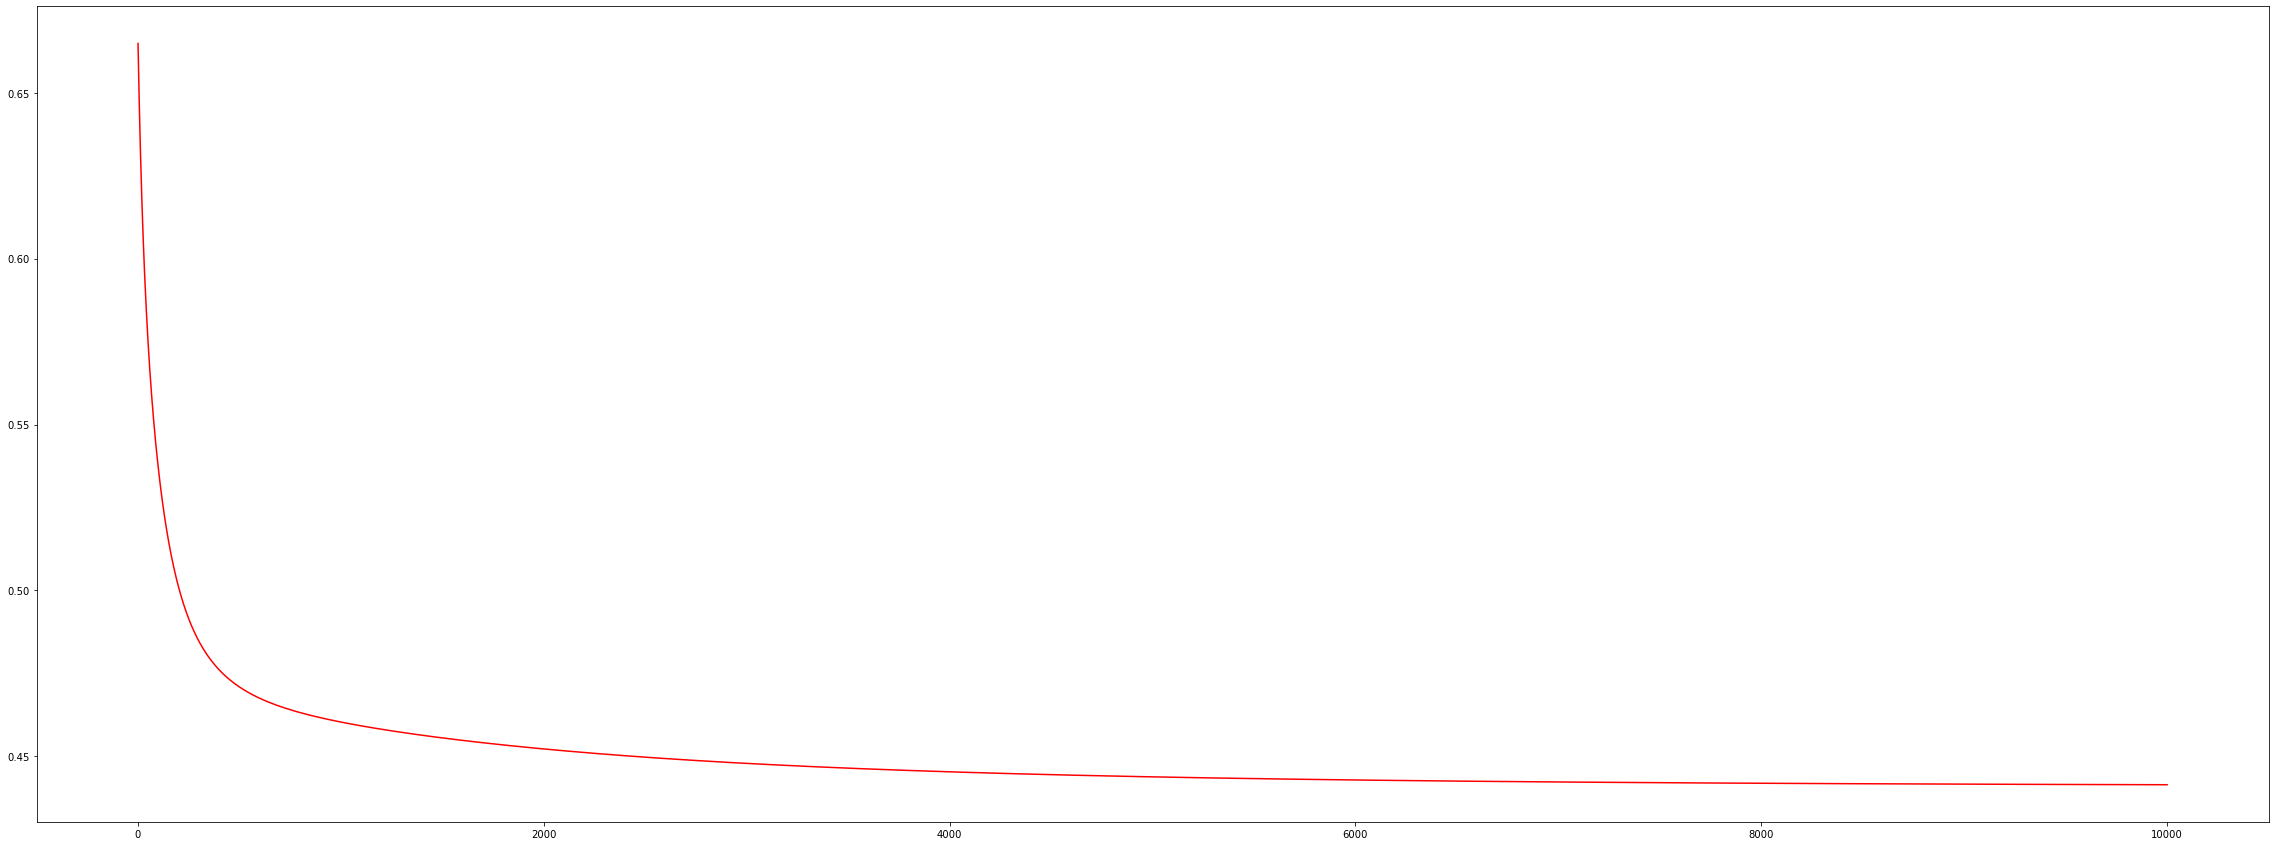

In [895]:
plt.figure(figsize=(40,15))
plt.plot(list(range(1,10001)),cost_history,color='red')

In [896]:
from sklearn.metrics import r2_score
survived_predict = predict(features1, weights)
survived_predict=np.array(survived_predict)
survived_predict = sigmoid(survived_predict)
survived_predict.shape=(len(survived_predict),1)
survived = np.array(train.Survived,dtype=np.float64)
survived.shape=(survived.size,1)

r2_score(survived,survived_predict)

0.40857518283530636

In [897]:
test=pd.read_csv(r"C:\Users\Saurabh\OneDrive - Manipal Academy of Higher Education\Desktop\MRM-Taskphase\WEEK_2\Week-2-Project\Titanic Dataset\test.csv",index_col=0)
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [898]:
print(test.isnull().sum())

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


In [899]:
test['Sex']=test['Sex'].astype("category")
test['Sex']=test['Sex'].cat.reorder_categories(['male','female'], ordered=True)
test['Sex']=test['Sex'].cat.codes
test['Embarked']=test['Embarked'].astype("category")
test['Embarked']=test['Embarked'].cat.reorder_categories(['S','Q','C'], ordered=True)
test['Embarked']=test['Embarked'].cat.codes
test['Age']=test['Age'].fillna(test['Age'].median())
test['Embarked']=test['Embarked'].fillna(train['Embarked'].median())
test['Fare']=test['Fare'].fillna(train['Fare'].median())
print(test.isnull().sum())

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
dtype: int64


In [900]:
features = np.array(test.loc[:,["Pclass","SibSp","Parch","Fare","Sex","Embarked","Age"]])
bias = np.ones(shape=(len(features),1))
features = np.append(features,bias, axis=1)


In [901]:
predicted = predict(features,weights)
predicted = sigmoid(predicted)
predicted

array([[1.94567450e-42],
       [1.11717277e-57],
       [6.00559325e-74],
       [1.90828214e-33],
       [3.26654053e-26],
       [1.22173402e-17],
       [6.45953535e-36],
       [7.85055076e-26],
       [2.48175424e-21],
       [7.17687678e-23],
       [1.07525587e-33],
       [8.92910411e-49],
       [1.63123758e-02],
       [5.62971746e-71],
       [3.33161987e-38],
       [8.78724468e-22],
       [1.23774119e-40],
       [4.07373817e-26],
       [2.42621206e-33],
       [8.79974931e-54],
       [5.48284841e-49],
       [6.78177587e-14],
       [6.45545270e-23],
       [6.03006494e-07],
       [1.00000000e+00],
       [5.03225047e-60],
       [8.94207368e-07],
       [6.41615914e-28],
       [2.64297788e-41],
       [2.67782767e-30],
       [2.36615107e-55],
       [3.75217178e-23],
       [4.89374403e-37],
       [6.83459740e-29],
       [1.77074721e-19],
       [4.12940835e-23],
       [1.81795181e-32],
       [4.67174867e-25],
       [9.04488425e-31],
       [6.66115137e-18],


In [906]:
for i in predicted :
    if i==1:
        print(i)

[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
